In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
def plot_digits(data):
    #data的结构必须是（m，n），并且n要能分成（8，8）这样的结构
    fig,axes = plt.subplots(4,10,figsize=(10,4),subplot_kw = {"xticks":[],"yticks":[]})
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap=plt.cm.binary)  

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

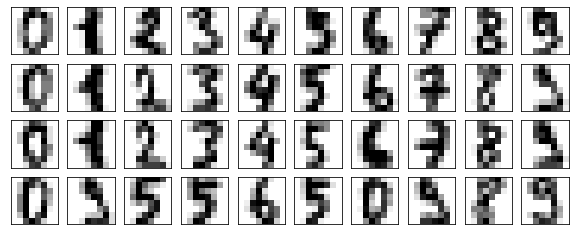

In [6]:
plot_digits(digits.data)

In [7]:
np.random.RandomState(42)
#在制定的数据集中，随机抽取服从正态分布的数据
#两个参数分别是指定的数据集，和抽取出来的正态分布的方差
noisy = np.random.normal(digits.data,2)

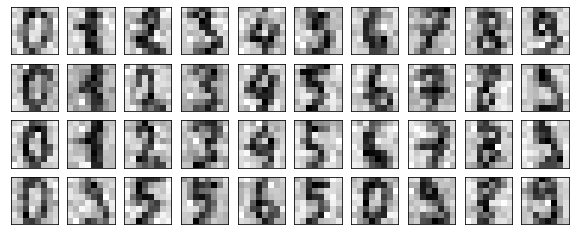

In [8]:
plot_digits(noisy)

In [9]:
#降噪（降维）
pca = PCA(0.8,svd_solver = "full").fit(noisy)
X_dr = pca.transform(noisy)


In [10]:
X_dr.shape

(1797, 21)

In [11]:
#转回原来的数据形态
without_noisy = pca.inverse_transform(X_dr)
without_noisy.shape

(1797, 64)

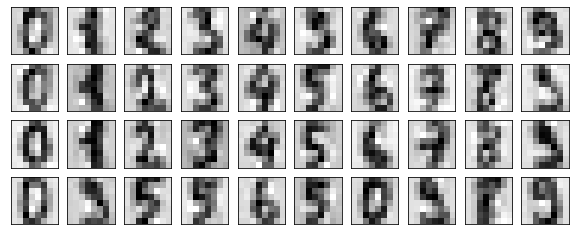

In [12]:
plot_digits(without_noisy)